In [44]:
# import statements

import pandas as pd
import matplotlib.pyplot as plt


In [69]:

# data_path = 
df = pd.read_stata('./backup/NGPR7ADT/NGPR7AFL.DTA')

print(df.shape)
# print((df["hv105"] < 5).sum() )
# print(df["sbelig"])


(188010, 357)


Q1 How many children under the age of five were tested for malaria with a blood smear
test?

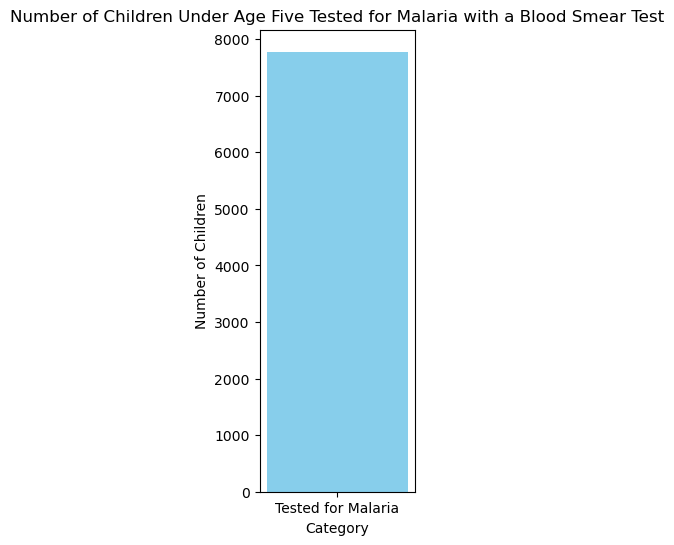

Number of children under age five tested for malaria with a blood smear test: 7778


In [49]:
children_under_five = df[(df['hv105'] < 5)]
children_tested_for_malaria = children_under_five[children_under_five['hml32'].notnull()]
num_children_tested_for_malaria = len(children_tested_for_malaria)

plt.figure(figsize=(2, 6))
plt.bar(['Tested for Malaria'], [num_children_tested_for_malaria], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Children')
plt.title('Number of Children Under Age Five Tested for Malaria with a Blood Smear Test')
plt.show()

print(f"Number of children under age five tested for malaria with a blood smear test: {num_children_tested_for_malaria}")


Q2 How many children under the age of five were tested for malaria with a rapid test?

In [51]:

age_column = 'hv105'
malaria_test_column = 'hml35'
df_cleaned = df.dropna(subset=[age_column, malaria_test_column])
children_under_five = df_cleaned[df_cleaned[age_column] < 5]
children_tested_for_malaria = children_under_five[children_under_five[malaria_test_column].notnull()]
num_children_tested_for_malaria = len(children_tested_for_malaria)
print(f"Number of children under the age of five tested for malaria with a rapid test: {num_children_tested_for_malaria}")


Number of children under the age of five tested for malaria with a rapid test: 10700


Q3 How many children tested positive for malaria with a microscopy?

Number of children under five who tested positive for malaria with microscopy: 0


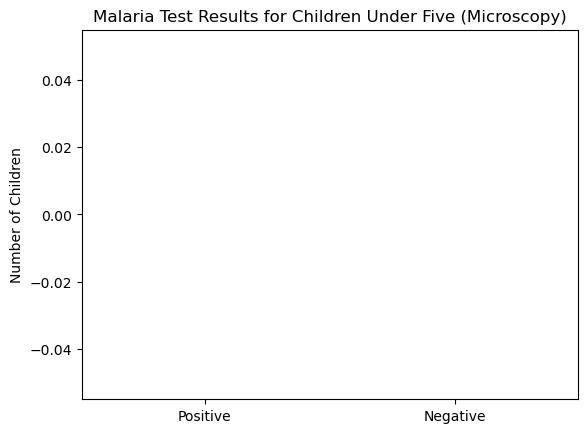

In [55]:
children_under_five = df[df['hv105'] < 5]

selected_for_microscopy = children_under_five[children_under_five['sbelig'] == 1]

positive_microscopy = selected_for_microscopy[selected_for_microscopy['hml32'] == 1].shape[0]

print(f"Number of children under five who tested positive for malaria with microscopy: {positive_microscopy}")


total_tested_microscopy = selected_for_microscopy.shape[0]

data = {
    'Positive': positive_microscopy,
    'Negative': total_tested_microscopy - positive_microscopy
}

fig, ax = plt.subplots()
ax.bar(data.keys(), data.values(), color=['green', 'red'])
ax.set_ylabel('Number of Children')
ax.set_title('Malaria Test Results for Children Under Five (Microscopy)')

plt.show()


Q4 How many children tested positive for malaria with a rapid test?

Number of children under five who tested positive for malaria with a rapid test: 0


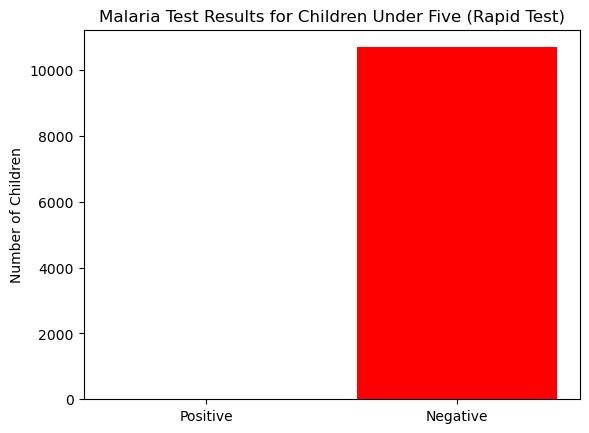

In [56]:
children_under_five = df[df['hv105'] < 5]

positive_rapid_test = children_under_five[children_under_five['hml35'] == 1].shape[0]

print(f"Number of children under five who tested positive for malaria with a rapid test: {positive_rapid_test}")
total_tested_rapid_test = children_under_five['hml35'].notnull().sum()

data = {
    'Positive': positive_rapid_test,
    'Negative': total_tested_rapid_test - positive_rapid_test
}

fig, ax = plt.subplots()
ax.bar(data.keys(), data.values(), color=['green', 'red'])
ax.set_ylabel('Number of Children')
ax.set_title('Malaria Test Results for Children Under Five (Rapid Test)')

# Display the plot
plt.show()


Q5 Make a plot showing the number of U5 children that tested positive for malaria by
microscopy and the number of U5 children that tested negative for malaria by
microscopy in urban and rural areas

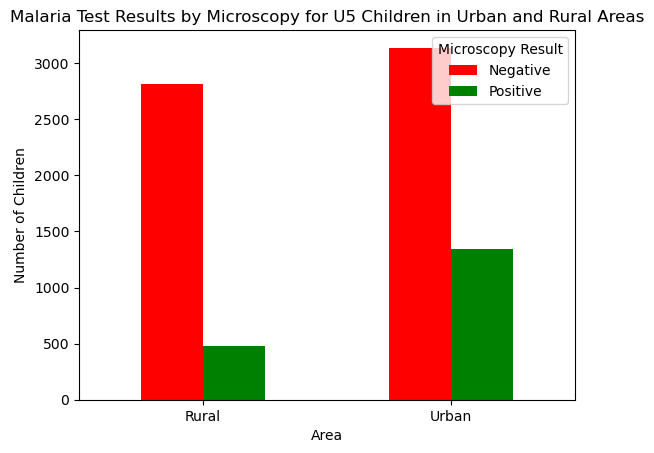

In [57]:
children_under_five = df[df['hv105'] < 5]

pivot_table = children_under_five.pivot_table(
    index='hv025', 
    columns='hml32', 
    aggfunc='size', 
    fill_value=0
)


pivot_table.columns = ['Negative', 'Positive']
pivot_table.index = ['Rural', 'Urban']

pivot_table.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Malaria Test Results by Microscopy for U5 Children in Urban and Rural Areas')
plt.xlabel('Area')
plt.ylabel('Number of Children')
plt.legend(title='Microscopy Result')
plt.xticks(rotation=0)

# Show the plot
plt.show()


Q6 Make another plot showing the proportion of U5 children that tested positive for
malaria by microscopy and the proportion of U5 children that tested negative for
malaria by microscopy in urban and rural areas

C:\Users\koner\AppData\Local\Temp\ipykernel_26248\2888322291.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_results_counts = children_under_five.groupby(['hv025', 'hml32']).size().unstack(fill_value=0)
C:\Users\koner\AppData\Local\Temp\ipykernel_26248\2888322291.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = children_under_five.groupby('hv025').size()


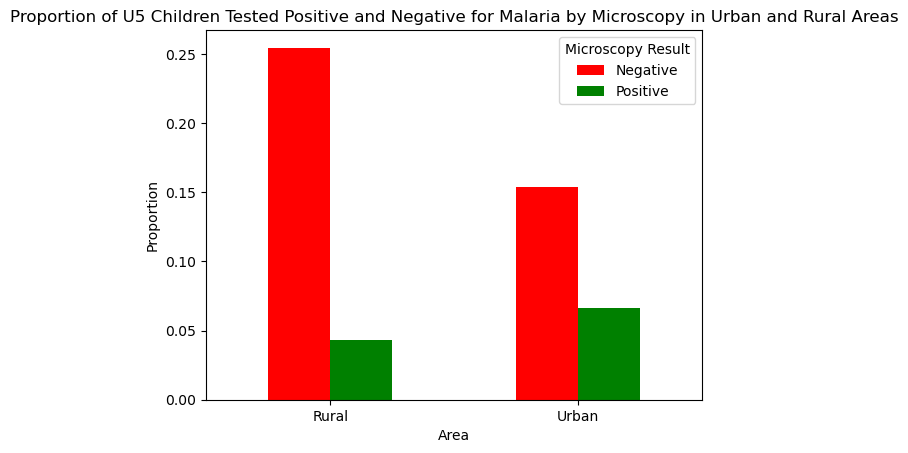

In [59]:
children_under_five = df[df['hv105'] < 5]

# Create a DataFrame for counts of test results by area
test_results_counts = children_under_five.groupby(['hv025', 'hml32']).size().unstack(fill_value=0)

# Calculate total number of children in each area
total_counts = children_under_five.groupby('hv025').size()

# Calculate proportions
proportions = test_results_counts.div(total_counts, axis=0)

# Rename index for clarity
proportions.index = ['Rural', 'Urban']

# Rename columns for clarity
proportions.columns = ['Negative', 'Positive']

# Plotting
proportions.plot(kind='bar', stacked=False, color=['red', 'green'])
plt.title('Proportion of U5 Children Tested Positive and Negative for Malaria by Microscopy in Urban and Rural Areas')
plt.xlabel('Area')
plt.ylabel('Proportion')
plt.legend(title='Microscopy Result')
plt.xticks(rotation=0)

# Show the plot
plt.show()


Q7 Make a map of the number of children that tested positive for malaria by state

In [61]:
import geopandas as gpd


# Filter children who tested positive for malaria
positive_cases = df[df['hml32'] == 1]  # Assuming '1' indicates positive cases

# Count the number of positive cases by state
positive_counts_by_state = positive_cases.groupby('shstate').size().reset_index(name='count')

# Load a GeoDataFrame with the geographical boundaries of states
# This GeoJSON file should have a 'state' or similar identifier matching 'shstate'
gdf = gpd.read_file('./backup/NGPR7ADT/NGPR7AFL.MAP')

# Merge the positive counts with the geographical data
gdf = gdf.merge(positive_counts_by_state, left_on='state_id', right_on='shstate', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='count', ax=ax, legend=True, cmap='OrRd', 
         legend_kwds={'label': "Number of Positive Malaria Cases", 'orientation': "horizontal"})

# Add title and axis labels
plt.title('Number of Children that Tested Positive for Malaria by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


C:\Users\koner\AppData\Local\Temp\ipykernel_26248\1712577170.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_counts_by_state = positive_cases.groupby('shstate').size().reset_index(name='count')


DataSourceError: PROJ: proj_create: unrecognized format / unknown name

C:\Users\koner\AppData\Local\Temp\ipykernel_26248\3313270008.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive_counts_by_state = positive_cases.groupby('shstate').size().reset_index(name='count')


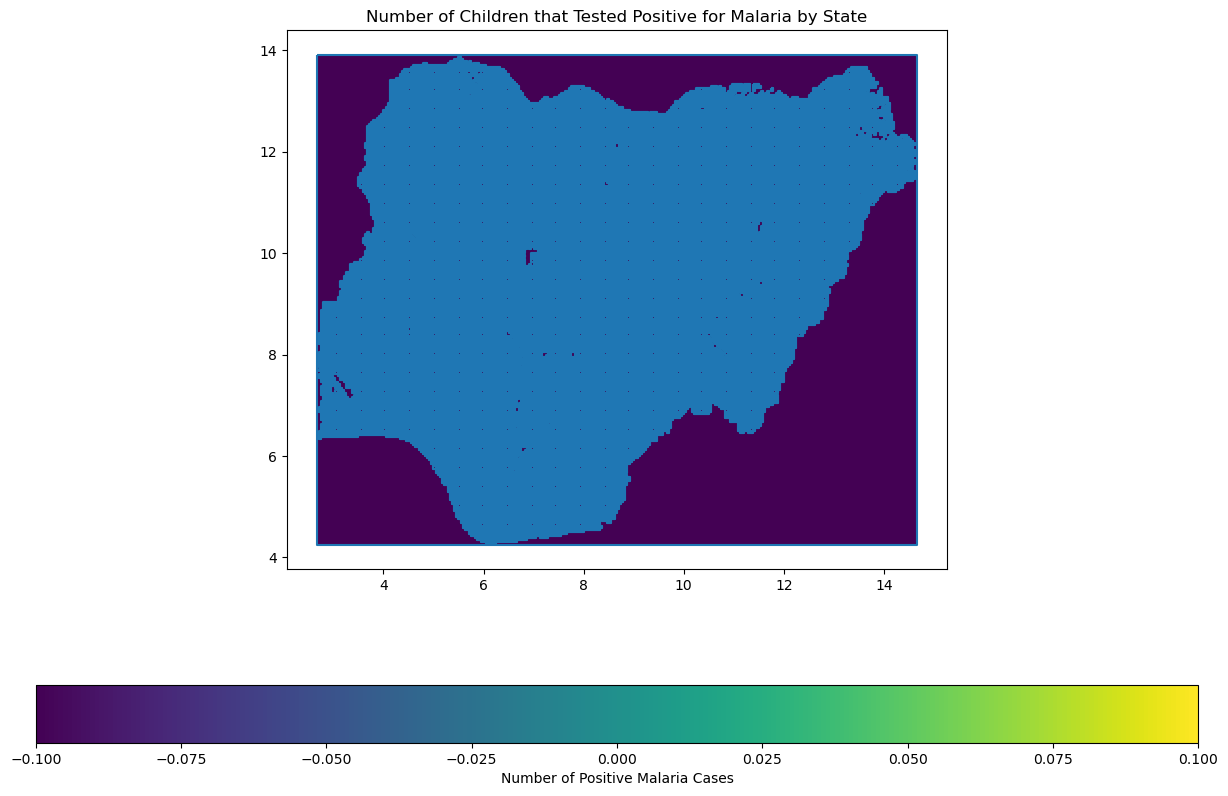

In [68]:
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.features import shapes
from shapely.geometry import shape

# Load your dataset
# df = pd.read_csv('data.csv')

# Filter children who tested positive for malaria
positive_cases = df[df['hml32'] == 1]  # Assuming '1' indicates positive cases

# Count the number of positive cases by state
positive_counts_by_state = positive_cases.groupby('shstate').size().reset_index(name='count')

# Load the .tiff file with state boundaries using rasterio
tiff_file = './NGPR7ADT/housing data 2019 nigeria/2019_Nature_Africa_Housing_2015_NGA.tiff'
with rasterio.open(tiff_file) as src:
    image = src.read(1)  # Read the first band
    transform = src.transform

# Extract shapes from the raster file
shapes_generator = shapes(image, transform=transform)
geometries = [shape(geom) for geom, value in shapes_generator]

# Create a GeoDataFrame
states_gdf = gpd.GeoDataFrame({'geometry': geometries}, crs=src.crs)

# Merge the positive counts with the GeoDataFrame
merged_gdf = states_gdf.merge(positive_counts_by_state, how='left', left_index=True, right_on='shstate').fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states_gdf.boundary.plot(ax=ax)
merged_gdf.plot(column='count', ax=ax, legend=True,
                legend_kwds={'label': "Number of Positive Malaria Cases",
                             'orientation': "horizontal"})

plt.title("Number of Children that Tested Positive for Malaria by State")
plt.show()


SCRAPING

Country: World, Population: 8120793000
Country: China, Population: 1409670000
Country: 1,404,910,000, Population: 17.3%
Skipping invalid population data for country: 1,404,910,000
Country: United States, Population: 335893238
Country: Indonesia, Population: 281603800
Country: Pakistan, Population: 241499431
Country: Nigeria, Population: 223800000
Country: Brazil, Population: 203080756
Country: Bangladesh, Population: 169828911
Country: Russia, Population: 146150789


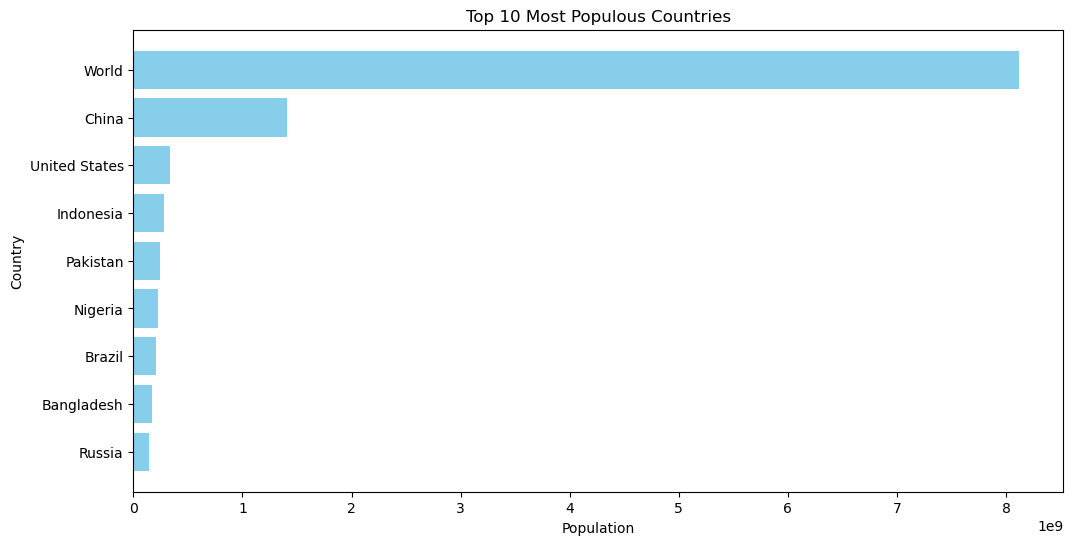

In [8]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the population data
    table = soup.find('table', {'class': 'wikitable sortable sticky-header sort-under mw-datatable col2left col6left'})

    # Ensure we found the table
    if table:
        # Extract the data
        countries = []
        populations = []

        for row in table.find_all('tr')[1:11]:  # Get the first 10 rows excluding the header
            cells = row.find_all('td')
            if len(cells) > 1:
                country = cells[1].text.strip()
                population = cells[2].text.strip().replace(',', '')
                print(f"Country: {country}, Population: {population}")  # Debug output
                try:
                    populations.append(int(population))
                except ValueError:
                    # If population is not a valid integer, skip this row
                    print(f"Skipping invalid population data for country: {country}")
                    continue
                countries.append(country)

        # Data visualization
        plt.figure(figsize=(12, 6))
        plt.barh(countries, populations, color='skyblue')
        plt.xlabel('Population')
        plt.ylabel('Country')
        plt.title('Top 10 Most Populous Countries')
        plt.gca().invert_yaxis()
        plt.show()

    else:
        print("Failed to find the table. The table structure might have changed.")
else:
    print(f"Failed to retrieve data: {response.status_code}")

